<a href="https://colab.research.google.com/github/pharringtonp19/mecon/blob/main/notebooks/Value.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title **Imports** { display-mode: "form" }
%%capture 
!pip install --upgrade oryx 

import oryx
import jax 
import jax.numpy as jnp
ppl = oryx.core.ppl
tfd = oryx.distributions
from oryx.core.ppl import log_prob
from functools import partial 

import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import rcParams
rcParams['image.interpolation'] = 'nearest'
rcParams['image.cmap'] = 'viridis'
rcParams['axes.grid'] = False
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# **Discrete Random Variable**

In [2]:
def bernoulli(key):
  x = ppl.random_variable(tfd.Bernoulli(probs=0.5))(key) + 1.
  return x

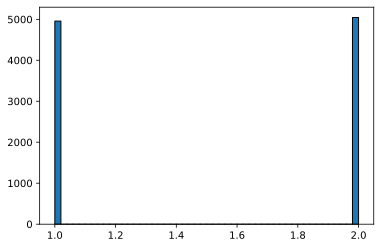

In [3]:
#@title **Samples** { display-mode: "form" }
n_samples = 10000 
ys = jax.vmap(bernoulli)(jax.random.split(jax.random.PRNGKey(0), n_samples))
plt.hist(ys, edgecolor='black', bins=50)
plt.show()

In [4]:
#@title **Expected Value** { display-mode: "form" }
def EV(u, pmf):
  return jnp.dot(u, pmf)

\begin{align*}
V(u, \textrm{pmf}):= \sum u(x)\textrm{pmf}(x)
\end{align*}

 <font size="4" color="purple">**Technical**</font>: The value function can be understood as the inner product between the utility function, $u$ and the probability mass function, $f$.

In [5]:
#@title **Compute**
f = lambda x: jnp.exp(log_prob(normal)(x))
identity = lambda x: x 
xs = jnp.array([1., 2.])
p = 0.5 
print(EV(jax.vmap(identity)(xs), jnp.array([p, 1-p])))
print(EV(jax.vmap(lambda x: jnp.sqrt(x))(xs), jnp.array([p, 1-p])))

1.5
1.2071068


# **Continuous Random Variable**

In [6]:
#@title **Standard Normal Random Variable** { display-mode: "form" }
def normal(key):
  x = ppl.random_variable(tfd.Normal(0., 1.))(key) + 10.
  return x

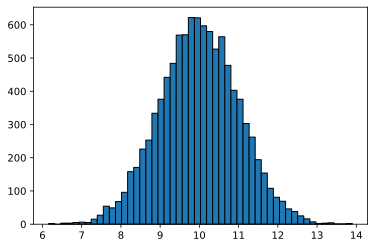

In [7]:
#@title **Samples** { display-mode: "form" }
n_samples = 10000 
ys = jax.vmap(normal)(jax.random.split(jax.random.PRNGKey(0), n_samples))
plt.hist(ys, edgecolor='black', bins=50)
plt.show()

In [8]:
#@title **Expected Value** { display-mode: "form" }
def EV(u, pdf, start, stop, n):

  delta_x = (stop-start)/n 
  
  def update(carry, t):
    value, x = carry
    value = value+ (u(x) * pdf(x))*delta_x
    return (value, x + delta_x), None
  (outcome, _), _ = jax.lax.scan(update, (0., start), None, n)
  return outcome

### **Valuation**

\begin{align*}
V(u, \textrm{pdf}):= \int u(x)\textrm{pdf}(x)dx
\end{align*}

 <font size="4" color="purple">**Technical**</font>: The value function can be understood as the inner product between the utility function, $u$ and the probability density function, $f$.

In [9]:
f = lambda x: jnp.exp(log_prob(normal)(x))
identity = lambda x: x 
EV(identity, f, 10-3., 10+3.,3000)

DeviceArray(9.973686, dtype=float32)

In [10]:
EV(lambda x: jnp.sqrt(x), f, 10-3., 10+3.,3000)

DeviceArray(3.1500883, dtype=float32)

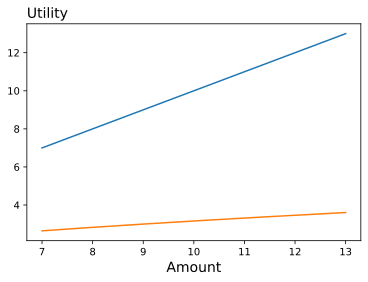

In [11]:
#@title Utility { display-mode: "form" }
xs = jnp.linspace(10-3., 10+3., 1000)
ys1 = jax.vmap(identity)(xs)
ys2 = jax.vmap(lambda x: jnp.sqrt(x))(xs)
plt.plot(xs, ys1)
plt.plot(xs, ys2)
plt.title('Utility', loc='left', size=14)
plt.xlabel('Amount', size=14)
plt.show()